Distance to impact is: 0.987 m
Maximum height is: 0.760 m 
Time of flight: 0.930 s
Velocity at impact: vx, vy: 0.015, -1.487 m/s


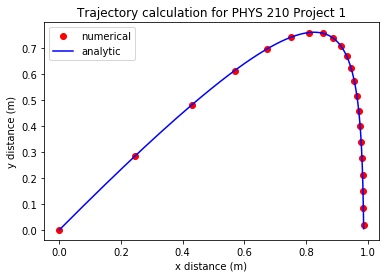

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# drag coefficient, kg/s
c = 0.65

# gravitational constant, m/s^2
g = 9.81

# mass of object, kg
m = 0.1

# initial speed, m/s
v0 = 10

# angle above horizontal: in degrees
theta = 50

def derivs(yAF, tF):
    """Calculate the time derivatives for the motion of a projectile.

    Arguments:
        yAF: array of variables. here yAF[0] is x and yAF[1] is y
        yAF[2] = vx, yAF[3] = vy
        tF: the time. Not used explicitly

    Returns:
        array of four values that are the time derivatives of x, y, vx and vy
    """

    global g, c, m
    x = yAF[0]
    y = yAF[1]
    vx = yAF[2]
    vy = yAF[3]
    return np.array([yAF[2], yAF[3], -c / m * vx, -g - c / m * vy])


# we need lots of points to determine max height, distance, and time of flight.
POINTS = 500

# We need a guess as to how long to integrate over.
# If there was no drag, then the time of flight would be
# given by (g T^2)/2 - v0y T = 0. Which would make
# T = 2 v0y/g and v0y = v0 sin(theta).
# with drag, the flight will be shorter.

tmax = 2 * v0 * np.sin(theta * np.pi / 180) / g
timeAF = np.linspace(0, tmax, POINTS)

# initial conditions for x, y, vx, vy
y0AF = np.array([0., 0., v0 * np.cos(theta * np.pi / 180),
                 v0 * np.sin(theta*np.pi / 180)])

yM = integrate.odeint(derivs, y0AF, timeAF)

# need to find where it hits. Where is the first value where y<0?
# ilast is the index of the first value after impact.
ilast = np.argmax(yM[:, 1] < 0)

# throw away values after impact
yM = yM[0:ilast]
timeAF = timeAF[0:ilast]

d = yM[-1, 0]

h = np.max(yM[:, 1])

T = timeAF[-1]

vi = np.sqrt(yM[-1, 2]**2 + yM[-1, 3]**2)
vxi = yM[-1,2]
vyi = yM[-1,3]

print("Distance to impact is: %5.3f m" % d)
print("Maximum height is: %5.3f m " % h)
print("Time of flight: %5.3f s" % T)
print("Velocity at impact: vx, vy: %5.3f, %5.3f m/s" % (vxi, vyi))

# calculate analytic solution:

vt = m * g / c
xAF = v0 * vt / g * np.cos(theta * np.pi / 180) * \
    (1 - np.exp(-g * timeAF / vt))
yAF = vt / g * (v0 * np.sin(theta * np.pi / 180) + vt) * \
    (1 - np.exp(-g * timeAF / vt)) - vt * timeAF

# for plotting, only want ~ 20 points.
increment = ilast // 20
# %matplotlib notebook
%matplotlib inline
plt.plot(yM[::increment, 0], yM[::increment, 1], "ro", label="numerical")
plt.plot(xAF, yAF, "b-", label="analytic")
plt.xlabel("x distance (m)")
plt.ylabel("y distance (m)")
plt.title("Trajectory calculation for PHYS 210 Project 1")
plt.legend()
# plt.savefig("ballistic.pdf")
plt.show() 